In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Задача 1

In [ ]:
def BWS_stat(x, y):
    n = len(x)
    m = len(y)

    x = [[x_, 1] for x_ in x]
    y = [[y_, 2] for y_ in y]

    K = sorted(x+y, key=lambda x: x[0], reverse=False)
    S = []
    R = []

    for i, el in enumerate(K):
        if el[1] == 1:
            S.append(i+1)
        else:
            R.append(i+1)

    BX = np.mean((np.array(S) - np.array([(n+m) / n * i for i in range(1, n+1)]))**2 / \
      (np.array([i / (n+1) for i in range(1, n+1)])) / \
      (np.array([1 - (i / (n+1)) for i in range(1, n+1)])) / \
      (m * (n+m) / n))

    BY = np.mean((np.array(R) - np.array([(n+m) / n * i for i in range(1, m+1)]))**2 / \
      (np.array([i / (m+1) for i in range(1, m+1)])) / \
      (np.array([1 - (i / (m+1)) for i in range(1, m+1)])) / \
      (n * (n+m) / m))

    return 0.5 * (BX + BY)

def BWS(x, y, perms=100):
    s = BWS_stat(x, y)
    z = list(x) + list(y)

    counter = 0
    for i in range(perms):
        z_ = np.random.permutation(z)
        if BWS_stat(z_[:len(x)], z_[len(x):]) > s:
            counter += 1
    return counter / perms



In [ ]:
size = 20
reps = 1000

cdf = lambda x, X: np.mean(X < x)
chi2_pvalue = []
ttest_pvalue = []
mw_pvalue = []
ks_pvalue = []
bws_pvalue = []

bins = int(size / 4)

for i in tqdm(range(reps)):
    X1 = st.norm.rvs(loc=1, scale=1, size=size)
    X2 = st.norm.rvs(loc=2, scale=2, size=size)

    borders = [-np.Inf] + [np.quantile(X1, i / (bins)) for i in range(1, bins)] + [np.Inf]

    c1 = []
    for i in range(len(borders)-1):
        c1.append(np.sum((X1 > borders[i]) & (X1 < borders[i+1])))

    c2 = []
    for i in range(len(borders)-1):
        c2.append(np.sum((X2 > borders[i]) & (X2 < borders[i+1])))

    chi2_pvalue.append(st.chi2_contingency([c1, c2])[1])
    ttest_pvalue.append(st.ttest_ind(X1, X2)[1])
    mw_pvalue.append(st.mannwhitneyu(X1, X2)[1])
    ks_pvalue.append(st.kstest(X1, X2)[1])
    bws_pvalue.append(BWS(X1, X2))

100%|██████████| 1000/1000 [00:18<00:00, 53.52it/s]


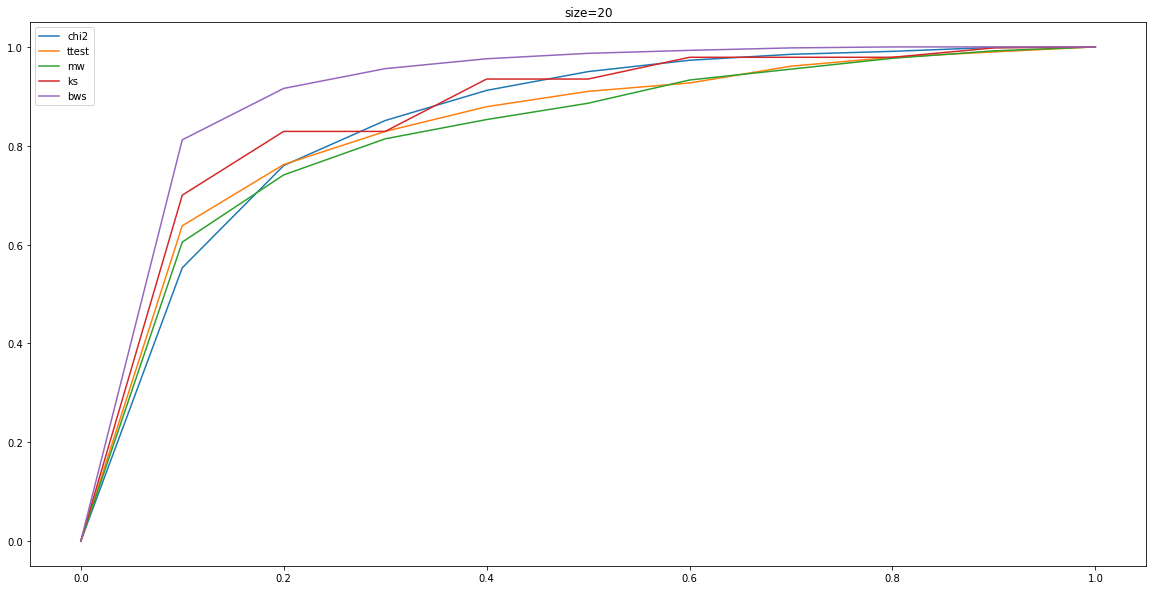

In [ ]:
plt.figure(figsize=(20, 10))
x = np.arange(0, 1+1/10, 1/10)

y1 = list(map(lambda x: cdf(x, chi2_pvalue), x))
y2 = list(map(lambda x: cdf(x, ttest_pvalue), x))
y3 = list(map(lambda x: cdf(x, mw_pvalue), x))
y4 = list(map(lambda x: cdf(x, ks_pvalue), x))
y5 = list(map(lambda x: cdf(x, bws_pvalue), x))

plt.plot(x, y1, x, y2, x, y3, x, y4, x, y5)
plt.title(f'size={size}')
plt.legend(['chi2', 'ttest', 'mw', 'ks', 'bws'])
plt.show()

In [ ]:
size = 100
reps = 1000

cdf = lambda x, X: np.mean(X < x)
chi2_pvalue = []
ttest_pvalue = []
mw_pvalue = []
ks_pvalue = []
bws_pvalue = []

bins = int(size / 4)

for i in tqdm(range(reps)):
    X1 = st.norm.rvs(loc=1, scale=1, size=size)
    X2 = st.norm.rvs(loc=2, scale=2, size=size)

    borders = [-np.Inf] + [np.quantile(X1, i / (bins)) for i in range(1, bins)] + [np.Inf]

    c1 = []
    for i in range(len(borders)-1):
        c1.append(np.sum((X1 > borders[i]) & (X1 < borders[i+1])))

    c2 = []
    for i in range(len(borders)-1):
        c2.append(np.sum((X2 > borders[i]) & (X2 < borders[i+1])))

    chi2_pvalue.append(st.chi2_contingency([c1, c2])[1])
    ttest_pvalue.append(st.ttest_ind(X1, X2)[1])
    mw_pvalue.append(st.mannwhitneyu(X1, X2)[1])
    ks_pvalue.append(st.kstest(X1, X2)[1])
    bws_pvalue.append(BWS(X1, X2))

100%|██████████| 1000/1000 [00:59<00:00, 16.76it/s]


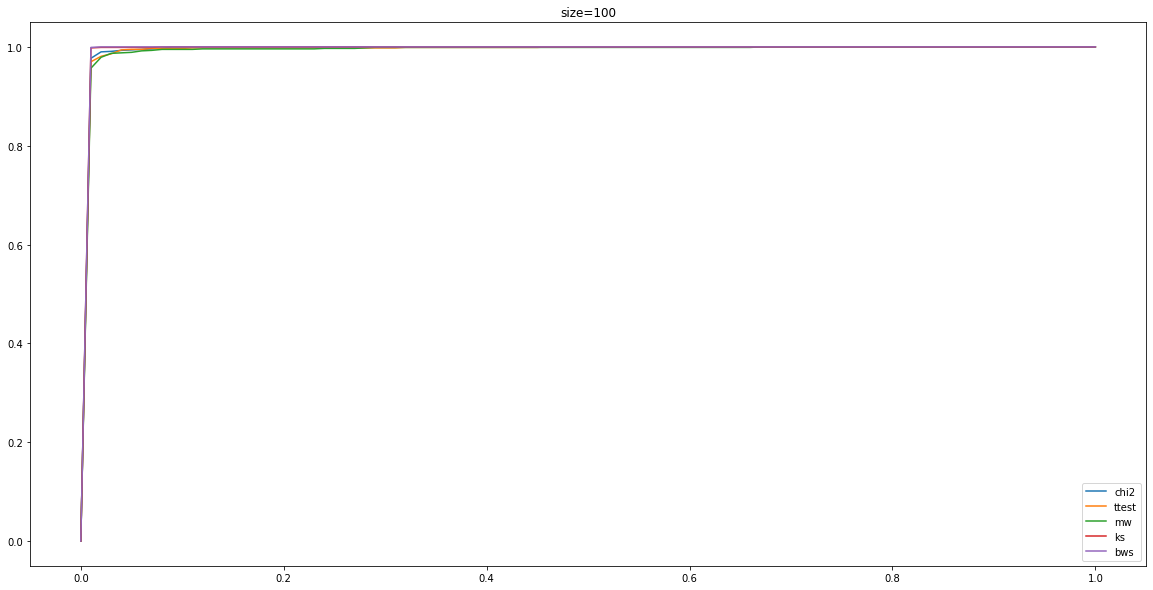

In [ ]:
plt.figure(figsize=(20, 10))
x = np.arange(0, 1+1/100, 1/100)

y1 = list(map(lambda x: cdf(x, chi2_pvalue), x))
y2 = list(map(lambda x: cdf(x, ttest_pvalue), x))
y3 = list(map(lambda x: cdf(x, mw_pvalue), x))
y4 = list(map(lambda x: cdf(x, ks_pvalue), x))
y5 = list(map(lambda x: cdf(x, bws_pvalue), x))

plt.plot(x, y1, x, y2, x, y3, x, y4, x, y5)
plt.title(f'size={size}')
plt.legend(['chi2', 'ttest', 'mw', 'ks', 'bws'])
plt.show()

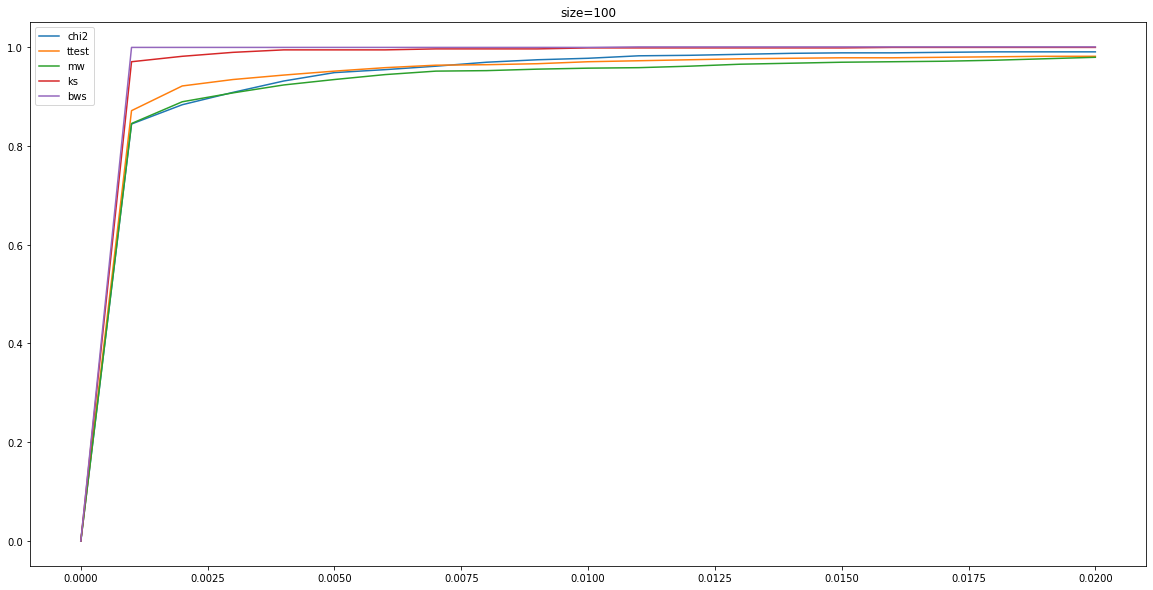

In [ ]:
plt.figure(figsize=(20, 10))
x = np.arange(0, 0.02+1/1000, 1/1000)

y1 = list(map(lambda x: cdf(x, chi2_pvalue), x))
y2 = list(map(lambda x: cdf(x, ttest_pvalue), x))
y3 = list(map(lambda x: cdf(x, mw_pvalue), x))
y4 = list(map(lambda x: cdf(x, ks_pvalue), x))
y5 = list(map(lambda x: cdf(x, bws_pvalue), x))

plt.plot(x, y1, x, y2, x, y3, x, y4, x, y5)
plt.title(f'size={size}')
plt.legend(['chi2', 'ttest', 'mw', 'ks', 'bws'])
plt.show()

# Задание 2

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Automobile_data.csv')

In [ ]:
df['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

In [ ]:
x1 = df[df['fuel-type'] == 'gas']['highway-mpg']
x2 = df[df['fuel-type'] == 'diesel']['highway-mpg']

In [ ]:
st.kstest(x1, x2)

KstestResult(statistic=0.32403314917127074, pvalue=0.03522346788677111)

In [ ]:
st.mannwhitneyu(x1, x2)

MannwhitneyuResult(statistic=1244.5, pvalue=0.021808202840914625)

In [ ]:
BWS(x1, x2, perms=10000)

0.0038

In [ ]:
df = df[df['price'] != '?']

In [ ]:
x1 = list(map(int, df[df['fuel-type'] == 'gas']['price'].to_numpy()))
x2 = list(map(int, df[df['fuel-type'] == 'diesel']['price'].to_numpy()))

In [ ]:
st.kstest(x1, x2)

KstestResult(statistic=0.25662983425414365, pvalue=0.15692344684971438)

In [ ]:
st.mannwhitneyu(x1, x2)

MannwhitneyuResult(statistic=1305.0, pvalue=0.0409798974040777)

In [ ]:
BWS(x1, x2, perms=10000)

0.0369

# Задача 3

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/cholestg.txt', sep='\t')
df

,patient,group,day,cholest
0,1,1,2.0,270.0
1,2,1,2.0,236.0
2,3,1,2.0,210.0
3,4,1,2.0,142.0
4,5,1,2.0,280.0
...,...,...,...,...
109,54,2,NaN,182.0
110,55,2,NaN,218.0
111,56,2,NaN,170.0
112,57,2,NaN,200.0


In [ ]:
pat = df[(df['group'] == 1) & (df['day'] == 14) & ~pd.isnull(df['cholest'])]['patient']

In [ ]:
x1 = np.array(list(map(float, df[(df['group'] == 1) & (df['day'] == 2) & (df['patient'].isin(pat))]['cholest'])))
x2 = np.array(list(map(float, df[(df['group'] == 1) & (df['day'] == 4) & (df['patient'].isin(pat))]['cholest'])))
x3 = np.array(list(map(float, df[(df['group'] == 1) & (df['day'] == 14) & (df['patient'].isin(pat))]['cholest'])))

In [ ]:
st.binom.sf(np.sum((x2 - x1) > 0), p=0.5, n=len(x1)), st.binom.cdf(np.sum((x2 - x1) > 0), p=0.5, n=len(x1))

(0.9164657592773438, 0.08353424072265625)

In [ ]:
st.binom.sf(np.sum((x3 - x2) > 0), p=0.5, n=len(x1)), st.binom.cdf(np.sum((x3 - x2) > 0), p=0.5, n=len(x1))

(0.6761970520019531, 0.3238029479980469)

In [ ]:
st.binom.sf(np.sum((x3 - x1) > 0), p=0.5, n=len(x1)), st.binom.cdf(np.sum((x3 - x1) > 0), p=0.5, n=len(x1))

(0.9903945922851562, 0.00960540771484375)

In [ ]:
0.05 / 3

0.016666666666666666

In [ ]:
st.wilcoxon(x1, x2)

WilcoxonResult(statistic=25.0, pvalue=0.0033416748046875)

In [ ]:
st.wilcoxon(x3, x2)

/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=63.0, pvalue=0.3269717835731263)

In [ ]:
st.wilcoxon(x1, x3)

WilcoxonResult(statistic=34.0, pvalue=0.012359619140625)

In [ ]:
control = np.array(list(map(float, df[(df['group'] == 2)]['cholest'])))
x1 = np.array(list(map(float, df[(df['group'] == 1) & (df['day'] == 2)]['cholest'])))
x3 = np.array(list(map(float, df[(df['group'] == 1) & (df['day'] == 14) & (df['patient'].isin(pat))]['cholest'])))

In [ ]:
BWS(control, x1, perms=10000)

0.0

In [ ]:
st.ttest_ind(control, x1)

Ttest_indResult(statistic=-6.285238671617634, pvalue=5.202077326006317e-08)

In [ ]:
BWS(control, x3, perms=10000)

0.0023

In [ ]:
st.ttest_ind(control, x3)

Ttest_indResult(statistic=-3.0250063711975748, pvalue=0.004022295544877714)

In [ ]:
control

array([196., 232., 200., 242., 206., 178., 184., 198., 160., 182., 182.,
       198., 182., 238., 198., 188., 166., 204., 182., 178., 212., 164.,
       230., 186., 162., 182., 218., 170., 200., 176.])

In [ ]:
x1

array([270., 236., 210., 142., 280., 272., 160., 220., 226., 242., 186.,
       266., 206., 318., 294., 282., 234., 224., 276., 282., 360., 310.,
       280., 278., 288., 288., 244., 236.])